# UAS Pengenalan Pola
## Farhan Radhi Zuhri
## 09011282126070
## SK5B

# CNN dengan dataset MNIST

# 1. MNIST
MNIST merupakan singkatan dari Modified National Institute of Standards and Technology database, sebuah dataset yang sering digunakan dalam pengembangan dan pengujian model dalam bidang pengenalan gambar dan pembelajaran mesin. Dataset ini terdiri dari sekumpulan gambar angka tulisan tangan yang sudah diproses menjadi citra berukuran 28x28 piksel dengan tingkat keabuan. MNIST terdiri dari 60.000 gambar untuk pelatihan dan 10.000 gambar untuk pengujian, di mana setiap gambar sudah diberi label yang menunjukkan angka yang tertera di dalamnya. Dataset ini telah menjadi benchmark standar bagi banyak penelitian dalam bidang pengenalan pola dan pembelajaran mesin untuk menguji kinerja algoritma dalam mengklasifikasikan gambar-gambar ini ke dalam kategori angka yang tepat.

### 1.1 Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


C:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2. Data Preparation

In [17]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')


In [20]:
print(data_train.shape , data_test.shape)

(42000, 785) (28000, 784)


In [3]:
X = data_train.drop(['label'], 1).values
y = data_train['label'].values

C:\Users\FARHAN~1\AppData\Local\Temp/ipykernel_11064/2724801128.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data_train.drop(['label'], 1).values


data di labeli agar lebih mudah untuk di proses

### 2.1. Reshape data

In [4]:
X = X / 255.0

data di bagi dengan 255 karena nilai greyscale biasanya 0-255, sehingga data menjadi 0 dan 1

In [5]:
X = X.reshape(-1,28,28,1)

data di ubah menjadi array -1 dengan ukuran 28 x 28

### 2.2. One - hot Encoding

In [6]:
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (42000, 10)


one-hot encoding digunakan dalam pemprosesan data untuk mengubah data yang dari kategorikal menjadi sebuah representasi biner, hal ini bertujuan agar mesin dapat lebih mudah mengenali data tersebut

## 3. Training Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

Training data bertujuan untuk memberikan informasi kepada model tentang pola, relasi, atau fitur-fitur yang perlu dipelajari agar model dapat membuat prediksi atau mengambil keputusan yang tepat. Dengan memberikan data yang bervariasi dan representatif, model dapat menyesuaikan parameter internalnya untuk memahami hubungan antara fitur-fitur input dan output yang diharapkan.

### 3.1. Visualisasi Training data

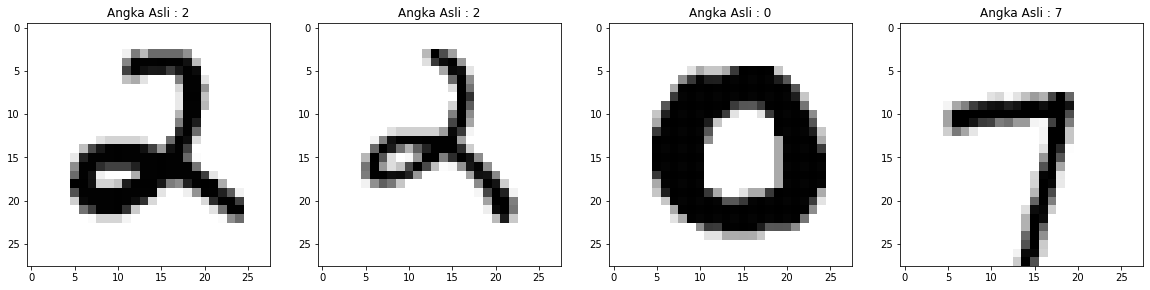

In [18]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Angka Asli : {digit}");

visualisasi training data bertujuan untuk melihat angka asli pada data sebelum dilakukan prediksi pada mesin

### 3.2. Normalisasi training data

In [10]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

normalisasi training data diperlukan untuk mentransformasi data tersebut untuk meningkatkan konvergensi dan pembelajaran pada mesin

## 4. CNN

### 4.1. Pembuatan Model untuk CNN

In [11]:
model = Sequential()

# block pertama
model.add(Conv2D(filters=20, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# block kedua
model.add(Conv2D(filters=50, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# block ketiga (Fully Connected layer)
model.add(Conv2D(filters=500, kernel_size=(4, 4), activation="relu"))
model.add(Flatten())

# Final block (Classification layer)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Jaringan BASE memiliki empat blok. Blok pertama terdiri dari konvolusi 5 x 5 x 1 x 20 dan max pooling; blok kedua terdiri dari konvolusi 5 x 5 x 20 x 50 dan max pooling; blok ketiga adalah konvolusi 4 x 4 x 50 x 500 (FC) ditambah lapisan ReLU; dan blok terakhir adalah lapisan klasifikasi (konvolusi 1 x 1 x 500 x 10).

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 20)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 20)        80        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 50)          0         
 g2D)                                                            
                                                        

### 4.2 Data augmentasi

In [12]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,   
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=15,  
        zoom_range = 0.01, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  



train_gen = datagen.flow(X_train, y_train, batch_size=128)
test_gen = datagen.flow(X_test, y_test, batch_size=128)

data augmentation membantu model CNN mempelajari fitur-fitur yang lebih umum dan memperluas pemahamannya terhadap berbagai variasi yang mungkin. Ini membantu mencegah overfitting atau data bertabrakan.

### 4.3 Training Model

In [13]:
import tensorflow as tf
tf.random.set_seed(0)
history = model.fit(X_train[:10000], y_train[:10000], epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
313/313 [==============================] - 6s 15ms/step - loss: 0.1878 - accuracy: 0.9397 - val_loss: 0.5526 - val_accuracy: 0.8445
Epoch 2/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0479 - accuracy: 0.9843 - val_loss: 0.0935 - val_accuracy: 0.9700
Epoch 3/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0337 - accuracy: 0.9891 - val_loss: 0.1271 - val_accuracy: 0.9717
Epoch 4/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0995 - val_accuracy: 0.9767
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0375 - accuracy: 0.9875 - val_loss: 0.0868 - val_accuracy: 0.9795
Epoch 6/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0128 - accuracy: 0.9953 - val_loss: 0.0802 - val_accuracy: 0.9814
Epoch 7/20
313/313 [==============================] - 5s 15ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0686 - val_accuracy: 0.9838

training model untuk mendapatkan akurasi yang baik. pada kasus ini model di training dengan memasukan 10000 sample data dengan epochs=20 dan batch size =32.

### 4.4. Visualisasi Confusion Matrix

132/132 [==============================] - 1s 5ms/step


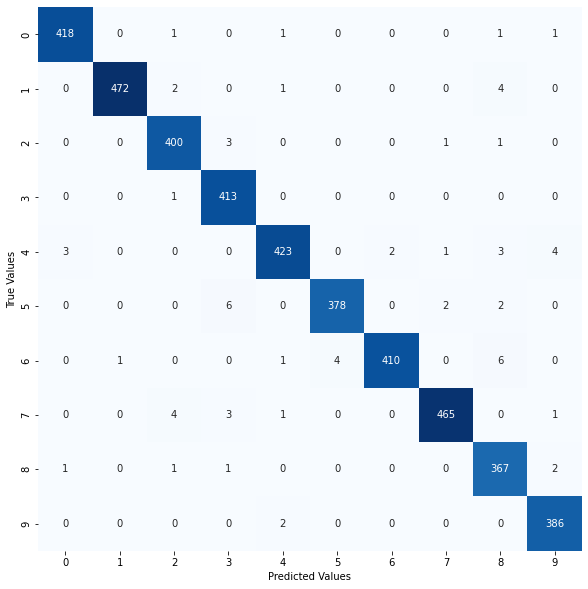

In [14]:
fig = plt.figure(figsize=(10, 10)) 

y_pred = model.predict(X_test) 

Y_pred = np.argmax(y_pred, 1) 
Y_test = np.argmax(y_test, 1) 

mat = confusion_matrix(Y_test, Y_pred) 

# Plot 
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

confusion matrix digunakan untuk menunjukan seberapa bagus performa mesin untuk melakukan mengklasifikasikan tiap kategori

### 4.5. Visualisasi loss dan accuracy

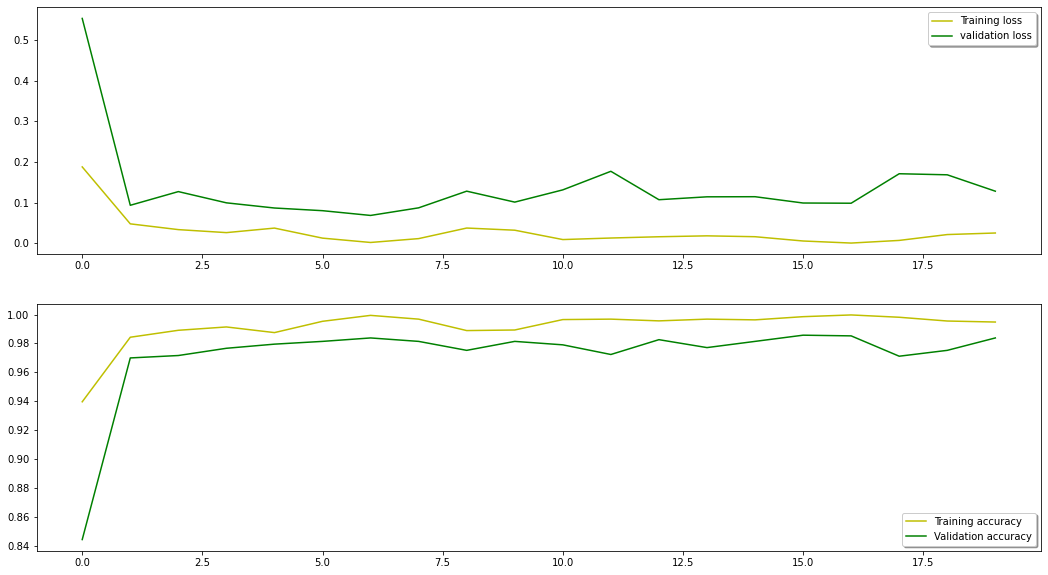

In [15]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='y', label="Training loss")
ax[0].plot(history.history['val_loss'], color='g', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='y', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='g',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### 4.6. Visualisasi Prediksi Model

132/132 [==============================] - 1s 5ms/step


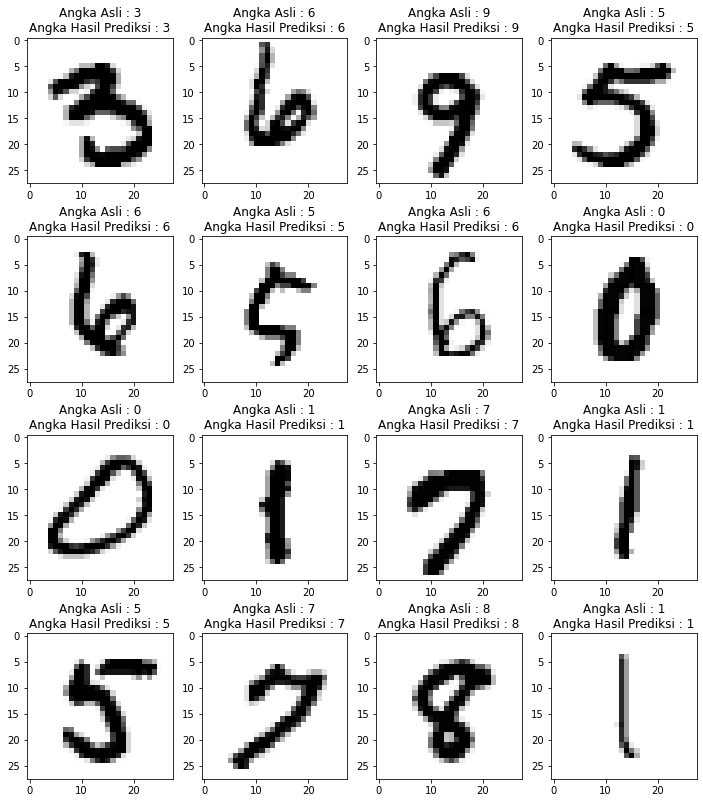

In [16]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Angka Asli : {y_test[i].argmax()}\nAngka Hasil Prediksi : {y_pred[i].argmax()}")